In [1]:
import numpy as np
import pandas as pd
import os


In [2]:
df = pd.read_csv(r'D:\\sonia\\codsoft internship 2024\\ML\\datasets\\IMDb Movies India.csv', encoding='ISO-8859-1')

In [3]:
df.dropna(inplace=True)

df['Year'] = df['Year'].str.extract('(\d+)').astype(int)

df['Duration'] = df['Duration'].str.extract('(\d+)').astype(int)

In [4]:
print(df.head())

                                 Name  Year  Duration  \
1  #Gadhvi (He thought he was Gandhi)  2019       109   
3                             #Yaaram  2019       110   
5                ...Aur Pyaar Ho Gaya  1997       147   
6                           ...Yahaan  2005       142   
8                  ?: A Question Mark  2012        82   

                       Genre  Rating  Votes        Director          Actor 1  \
1                      Drama     7.0      8   Gaurav Bakshi     Rasika Dugal   
3            Comedy, Romance     4.4     35      Ovais Khan          Prateik   
5     Comedy, Drama, Musical     4.7    827    Rahul Rawail       Bobby Deol   
6        Drama, Romance, War     7.4  1,086  Shoojit Sircar  Jimmy Sheirgill   
8  Horror, Mystery, Thriller     5.6    326   Allyson Patel        Yash Dave   

                  Actor 2          Actor 3  
1          Vivek Ghamande    Arvind Jangid  
3              Ishita Raj  Siddhant Kapoor  
5  Aishwarya Rai Bachchan    Shammi Kapoo

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

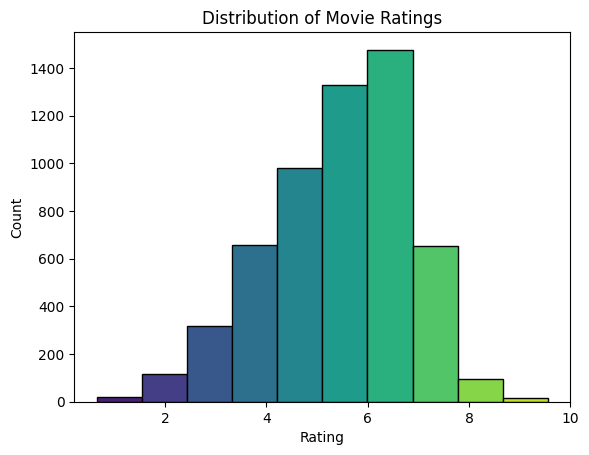

In [6]:
counts, bin_edges = np.histogram(df['Rating'], bins=10)

colors = sns.color_palette("viridis", len(counts))
for count, edge, color in zip(counts, bin_edges[:-1], colors):
    plt.bar(edge, count, width=bin_edges[1] - bin_edges[0], color=color, edgecolor="black")

plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

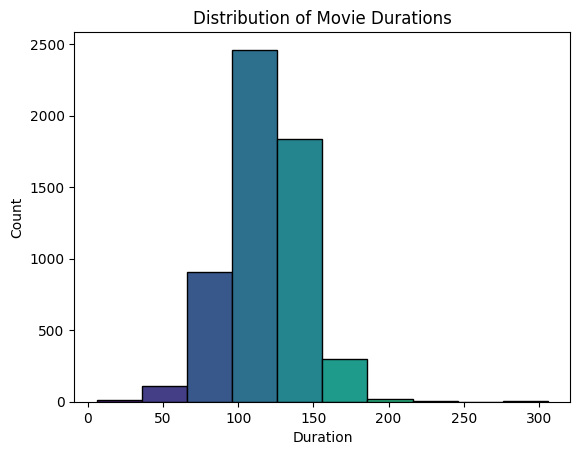

In [7]:
counts, bin_edges = np.histogram(df['Duration'], bins=10)

colors = sns.color_palette("viridis", len(counts))

for count, edge, color in zip(counts, bin_edges[:-1], colors):
    plt.bar(edge, count, width=bin_edges[1] - bin_edges[0], color=color, edgecolor="black")

plt.title('Distribution of Movie Durations')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.show()

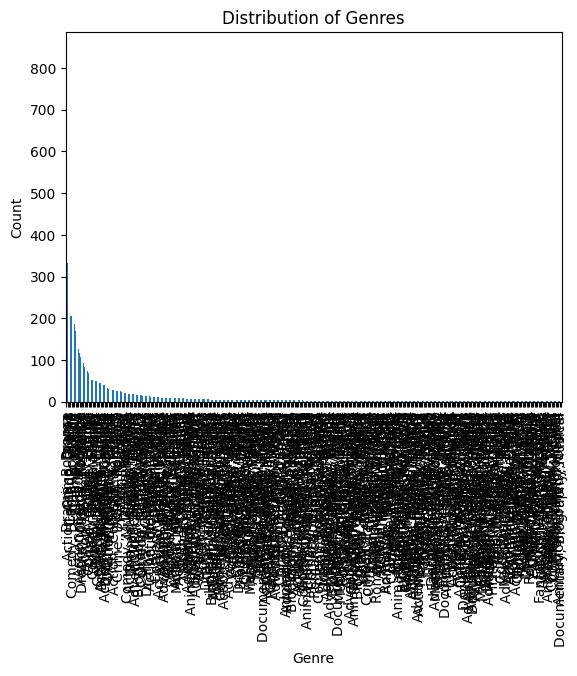

In [8]:
df['Genre'].value_counts().plot(kind='bar')
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

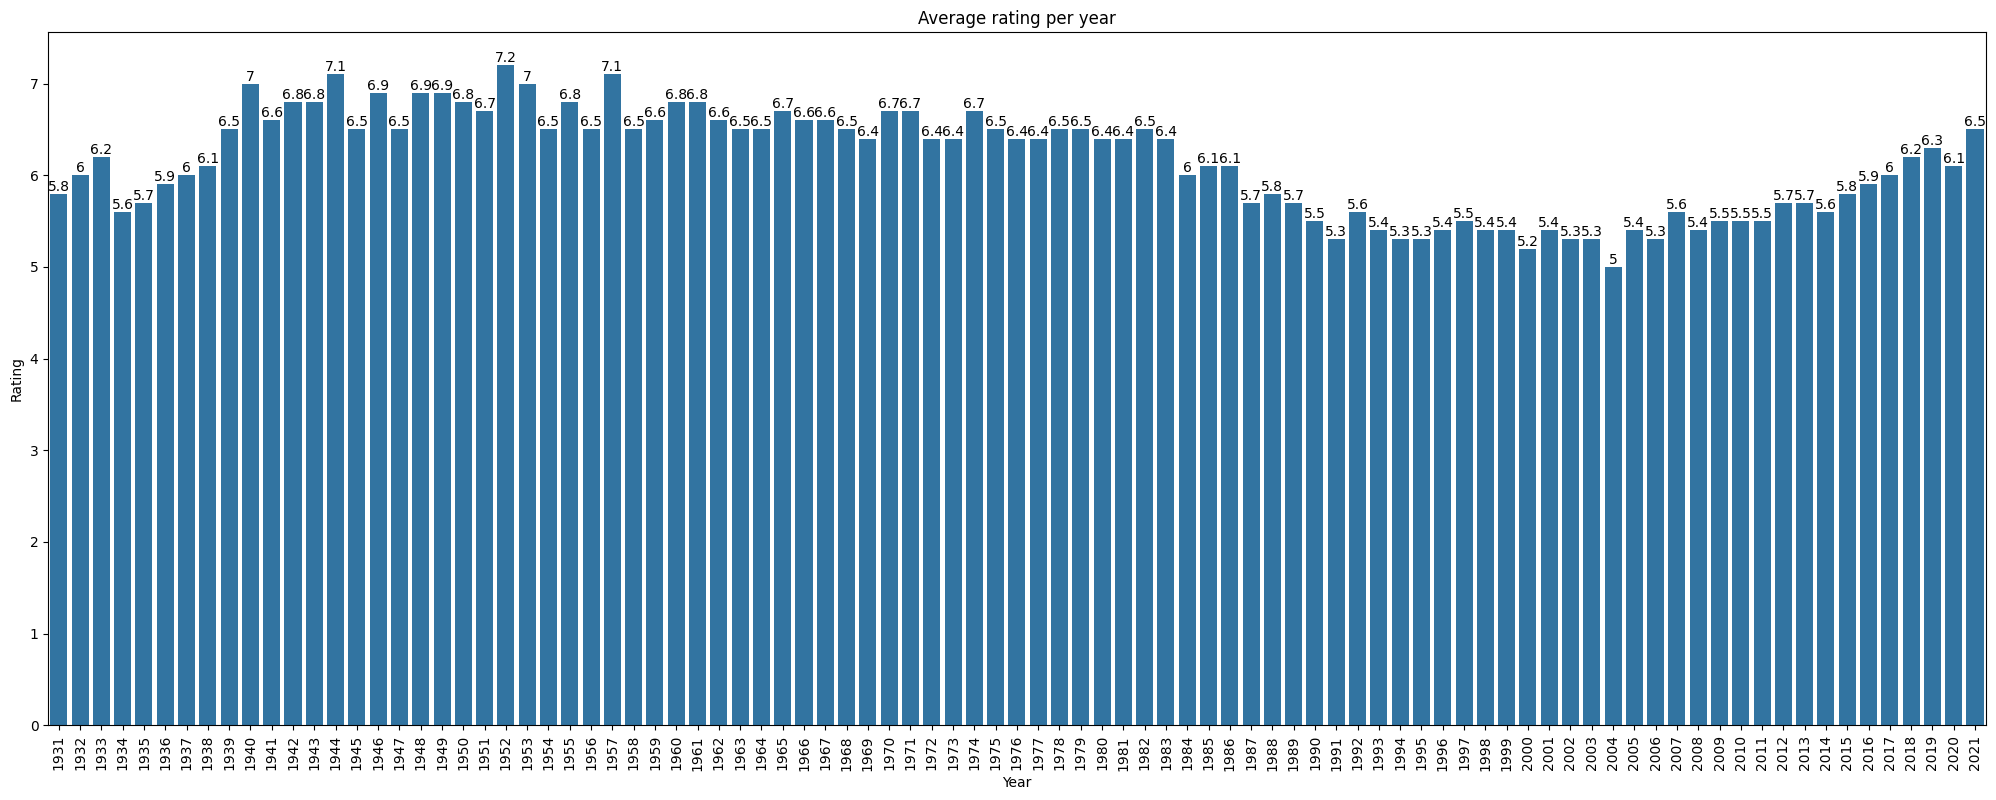

In [9]:
year_rating = df.groupby('Year').agg({'Rating': 'mean'}).reset_index().sort_values(by='Rating',
                                                                     ascending=False,
                                                                     )
year_rating['Rating'] = round(year_rating['Rating'],1)

plt.figure(figsize=(25,9))
ax = sns.barplot(data=year_rating, x='Year', y='Rating')
ax.bar_label(ax.containers[0])
plt.title('Average rating per year')
plt.xticks(rotation=90)
plt.show()

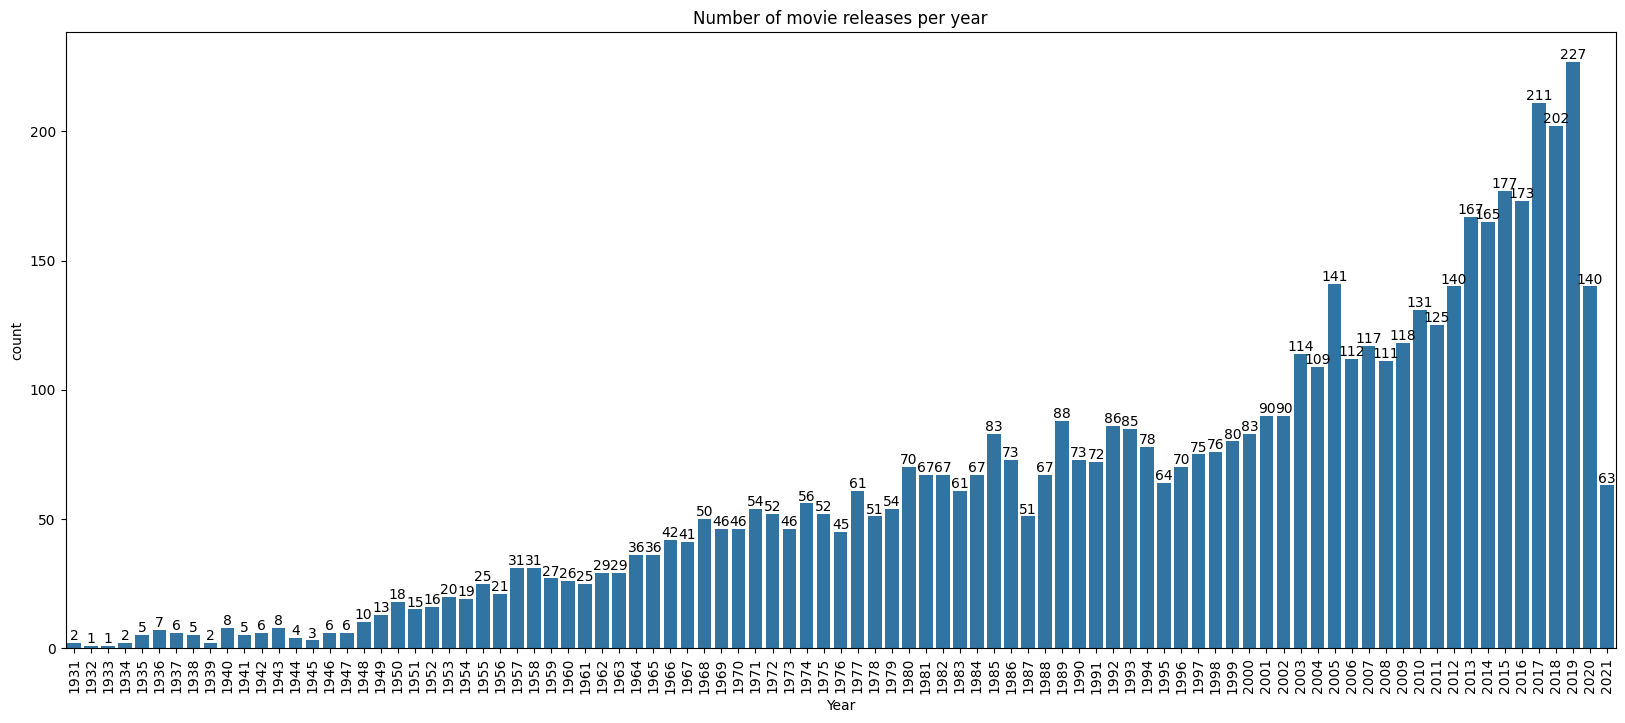

In [16]:
year_count = df.groupby('Year').agg({'Name':'count'}).rename(columns={'Name':'count'}).\
                                        sort_values(by='count', ascending=False).reset_index()
plt.figure(figsize=(20,8))
ax = sns.barplot(data=year_count, x='Year', y='count')
ax.bar_label(ax.containers[0])
plt.title('Number of movie releases per year')
plt.xticks(rotation=90)
plt.show()

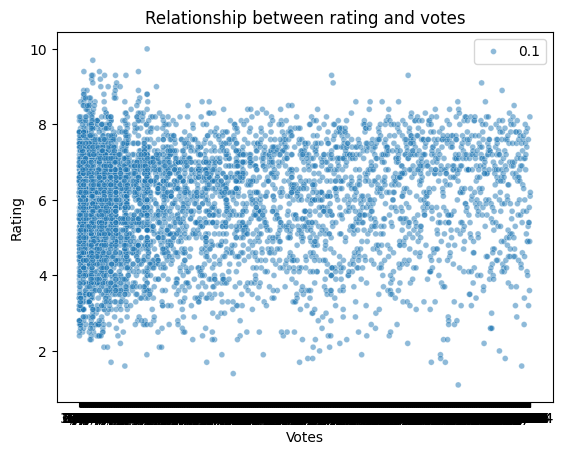

In [17]:
sns.scatterplot(data=df, x='Votes', y='Rating', size=0.1, alpha=0.5)
plt.title('Relationship between rating and votes')
plt.show()

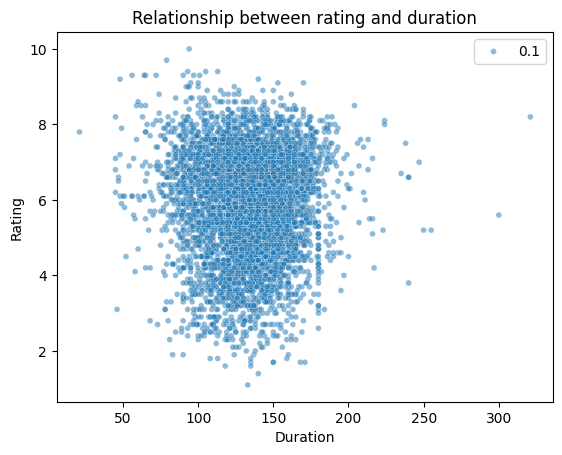

In [18]:
sns.scatterplot(data=df, x='Duration', y='Rating', size=0.1, alpha=0.5)
plt.title('Relationship between rating and duration')
plt.show()

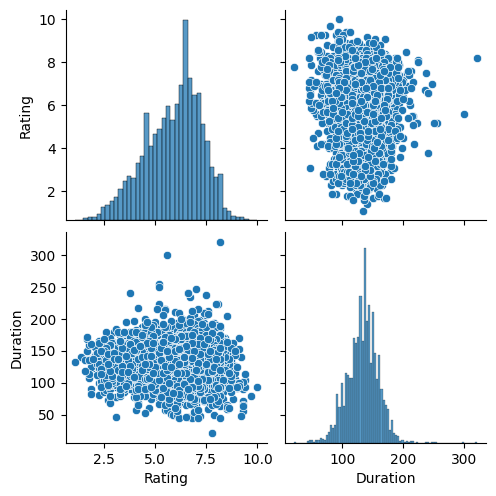

In [19]:
sns.pairplot(df[['Votes', 'Rating', 'Duration']])

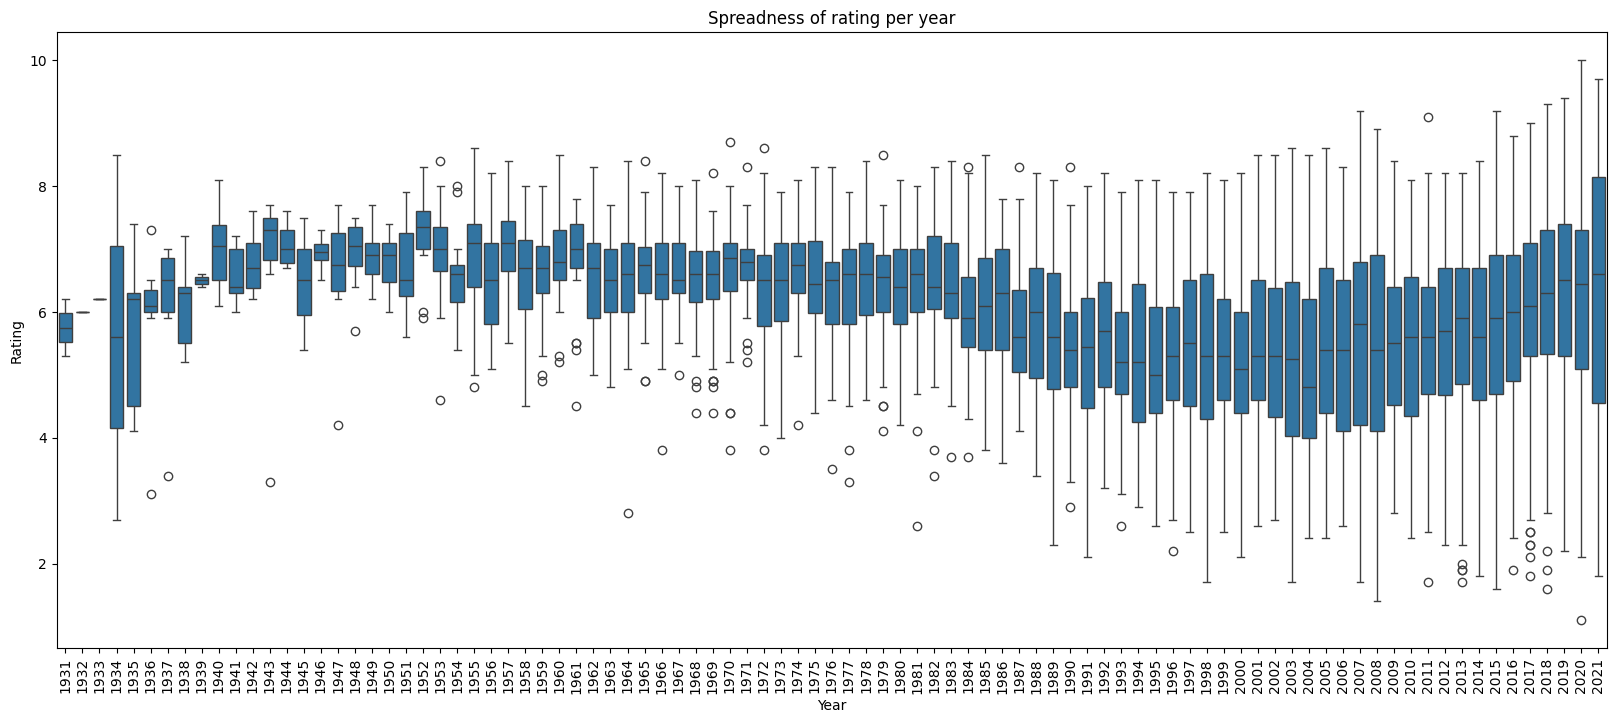

In [21]:
plt.figure(figsize=(20,8))
sns.boxplot(data=df, x='Year', y='Rating')
plt.title('Spreadness of rating per year')
plt.xticks(rotation=90)
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( test_size=0.33, random_state=42)

In [12]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_mae = mean_absolute_error(y_test, gb_pred)
print(f'Gradient Boosting MAE: {gb_mae}')


Gradient Boosting MAE: 0.9651987884817275


In [13]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_pred)
print(f'Random Forest MAE: {rf_mae}')

Random Forest MAE: 0.9266697002141326


In [14]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
print(f'Ridge Regression MAE: {ridge_mae}')

Ridge Regression MAE: 0.9479846560190973


In [15]:
results = pd.DataFrame({
    'Model': ['Gradient Boosting', 'Random Forest', 'Ridge Regression'],
    'MAE': [gb_mae, rf_mae, ridge_mae]
})

print(results)

               Model       MAE
0  Gradient Boosting  0.965199
1      Random Forest  0.926670
2   Ridge Regression  0.947985
